**Projeto de aprendizado de máquina Python - Detecção da doença de Parkinson com o XGBoost**

---

 Neste projeto de aprendizado de máquina Python, construiremos um modelo usando o qual podemos detectar com precisão a presença da doença de Parkinson no corpo.

Neste projeto de aprendizado de máquina Python, usando as bibliotecas Python scikit-learn, numpy, pandas e xgboost, construiremos um modelo usando um XGBClassifier. Carregaremos os dados, obteremos os recursos e rótulos, escalaremos os recursos e, em seguida, dividiremos o conjunto de dados, construiremos um XGBClassifier e então calcularemos a precisão do nosso modelo.

Conjunto de dados para projeto de aprendizado de máquina Python
Você precisará do conjunto de dados UCI ML Parkinsons para isso. O conjunto de dados tem 24 colunas e 195 registros e tem apenas 39,7 KB.

In [ ]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Carregamento dos dados
df=pd.read_csv('/content/drive/MyDrive/Projetos Data Science /Deteccao Parkinson/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# - Obtenha os recursos e rótulos
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [ ]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [ ]:
#DataFlair - Dimensione os recursos para entre -1 e 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)
print("[INFO] Tamanho de cada conjunto de dados...")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[INFO] Tamanho de cada conjunto de dados...
(156, 22) (39, 22) (156,) (39,)


In [ ]:
#DataFlair - Train the model
model=XGBClassifier()
xgb = model.fit(x_train,y_train)
print("[INFO] Rede neural treinada com sucesso!!!")

[INFO] Rede neural treinada com sucesso!!!


In [ ]:
# DataFlair - Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [ ]:
print("[INFO] calculando a matriz de confusão do classificador...")
#vamos calcular a matriz de confusão do modelo, para vermos o desempenho do classificador
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)

[INFO] calculando a matriz de confusão do classificador...
[[ 5  2]
 [ 0 32]]


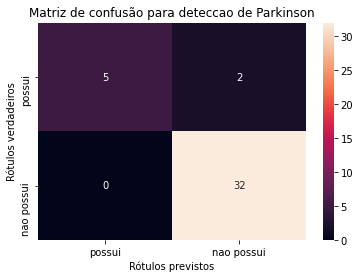

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot = True para anotar células

# rótulos, título e subrótulos
ax.set_xlabel('Rótulos previstos');ax.set_ylabel('Rótulos verdadeiros'); 
ax.set_title('Matriz de confusão para deteccao de Parkinson'); 
ax.xaxis.set_ticklabels(['possui', 'nao possui']); ax.yaxis.set_ticklabels(['possui', 'nao possui']);
plt.show()